In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
dta = sm.datasets.fair.load_pandas().data
df_affair = dta.copy()
print(df_affair.head())
print('**************************************************************************************************************')
print(df_affair.info())
print('**************************************************************************************************************')
print(dta.isnull().sum())

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb   affairs  
0              5.0  0.111111  
1              4.0  3.230769  
2              5.0  1.400000  
3              5.0  0.727273  
4              4.0  4.666666  
**************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
child

In [3]:
dta['affairs'] = (dta['affairs']>0).astype(int)
print(dta.head())

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb  affairs  
0              5.0        1  
1              4.0        1  
2              5.0        1  
3              5.0        1  
4              4.0        1  


In [4]:
y, x = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
print(x.columns)
print(y.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')
Index(['affairs'], dtype='object')


In [15]:

X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
print(x.head(2))
y = np.ravel(y)
print(y)

   Intercept  C(occupation)[T.2.0]  C(occupation)[T.3.0]  \
0        1.0                   1.0                   0.0   
1        1.0                   0.0                   1.0   

   C(occupation)[T.4.0]  C(occupation)[T.5.0]  C(occupation)[T.6.0]  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   

   C(occupation_husb)[T.2.0]  C(occupation_husb)[T.3.0]  \
0                        0.0                        0.0   
1                        0.0                        0.0   

   C(occupation_husb)[T.4.0]  C(occupation_husb)[T.5.0]  \
0                        0.0                        1.0   
1                        1.0                        0.0   

   C(occupation_husb)[T.6.0]  rate_marriage   age  yrs_married  children  \
0                        0.0            3.0  32.0          9.0       3.0   
1                        0.0            3.0  27.0         13.0       3.0   

   religious  educ  

In [5]:
print(dta.describe())

       rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs  
count  6366.000000  6366.000000      6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.322495  
std       2.178003     0.942399         1.346435     0.467468  
min       9.000000     1.000000         1.000000     0.0000

In [6]:
print(dta.describe(include='all'))

       rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs  
count  6366.000000  6366.000000      6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.322495  
std       2.178003     0.942399         1.346435     0.467468  
min       9.000000     1.000000         1.000000     0.0000

In [7]:
print(dta.groupby('affairs').describe())

            age                                                    children  \
          count       mean       std   min   25%   50%   75%   max    count   
affairs                                                                       
0        4313.0  28.390679  6.809684  17.5  22.0  27.0  32.0  42.0   4313.0   
1        2053.0  30.537019  6.699997  17.5  27.0  27.0  37.0  42.0   2053.0   

                   ...  religious      yrs_married                            \
             mean  ...        75%  max       count       mean       std  min   
affairs            ...                                                         
0        1.238813  ...        3.0  4.0      4313.0   7.989335  7.101994  0.5   
1        1.728933  ...        3.0  4.0      2053.0  11.152460  7.185216  0.5   

                               
         25%  50%   75%   max  
affairs                        
0        2.5  6.0  13.0  23.0  
1        6.0  9.0  16.5  23.0  

[2 rows x 64 columns]


rate_marriage  1.0  2.0  3.0   4.0   5.0
affairs                                 
0               25  127  446  1518  2197
1               74  221  547   724   487


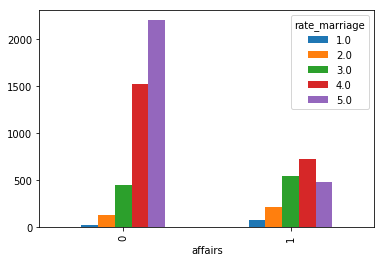

In [8]:
print(pd.crosstab(dta['affairs'],dta['rate_marriage'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['rate_marriage'],rownames=['affairs']).plot(kind='bar')

Text(0, 0.5, 'Frequency')

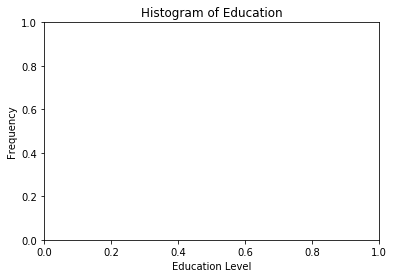

In [10]:
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

In [11]:
logit = sm.Logit(y, x)
result = logit.fit()
print(result)
model = LogisticRegression()
model = model.fit(x, y)

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


D:\SW\Python\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SW\Python\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
print(model.score(x, y))
print(y.mean())

0.7258875274897895
affairs    0.322495
dtype: float64


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
x_train.shape, x_test.shape, y_test.shape, y_test.shape

((4456, 17), (1910, 17), (1910, 1), (1910, 1))

In [15]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)
print(model2.score(x_train, y_train))

0.723967684021544


D:\SW\Python\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SW\Python\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
predicted = model2.predict(x_test)
print(predicted)
print('******************************************************************************************************')
probs = model2.predict_proba(x_test)
print(probs)

[1. 0. 0. ... 0. 0. 0.]
******************************************************************************************************
[[0.3514263  0.6485737 ]
 [0.90952493 0.09047507]
 [0.72576699 0.27423301]
 ...
 [0.55737109 0.44262891]
 [0.81213807 0.18786193]
 [0.74729545 0.25270455]]


In [17]:
print(metrics.accuracy_score(y_test, predicted))
print('******************************************************************************************************')
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7298429319371728
******************************************************************************************************
0.7459619860896347


In [18]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

   micro avg       0.73      0.73      0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [19]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=10)
scores, scores.mean()

D:\SW\Python\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SW\Python\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\SW\Python\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\SW\Python\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\SW\Python\anaconda\lib\site-packages\sklearn\linear_model\logistic.

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

In [20]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4,16]]))

array([[0.7747239, 0.2252761]])

In [21]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30, 10, 3, 4,16]]))

array([[0.67998263, 0.32001737]])